In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def nucleus_energy(N, Z, D):
    """ 
    Calculates binding energy of nucleus.
        N - number of neutrons
        Z - number of protons
        D - quantum pairing factor
        These may be numpy arrays.
    """
    
    A = N + Z
    alpha = 15.753
    beta = 17.804
    gamma = 0.7103
    epsilon = 23.69
    
    """ alpha, beta, gamma and epsilon factors may vary in different books """
        
    return (alpha*(A) - beta*(A**(2/3)) - gamma*(Z*(Z-1))/(A**(1/3)) - epsilon*((N-Z)**2)/A) + D

#### Generate two numpy arrays N (number of neutrons) and Z (number of protons)

In [21]:
N = np.arange(1, 180)
Z = np.arange(1, 120)

#### Generate mass number from 2 to sum of maximums of N and Z

In [22]:
A = np.arange(2, N.max()+Z.max())

#### Create two arrays Zv, Nv of shape (Z.shape and N.shape) their values are the same as Z and N

In [23]:
Zv, Nv = np.meshgrid(Z, N)

#### Quantum pairing factor has different values dependent on parity of Z and N
Code below creates array D with sum of modulos of Zv and Nv. The array will have values 0, 1 and 2. 0 when both Z and N are even, 1 when only one of them is even and 2 if both are odd. Then the code changes these numbers with proper values of quantum pairing factor.

In [24]:
D = Zv%2 + Nv%2
D = np.where(D == 2, -34*(Zv + Nv)**(-3/4), D)
D = np.where(D == 0, 34*(Zv + Nv)**(-3/4), D)
D = np.where(D == 1, 0, D)

In [25]:
# K. N. Muchin
stab_path_Z = (A)/(1.98 +0.015*(A)**(2/3))
stab_path_N = A - stab_path_Z
# Krane
Zmin = (A)/(2*(1+1/4*(A)**(2/3)*0.72/23))
Nmin = A-Zmin

#### Visualization

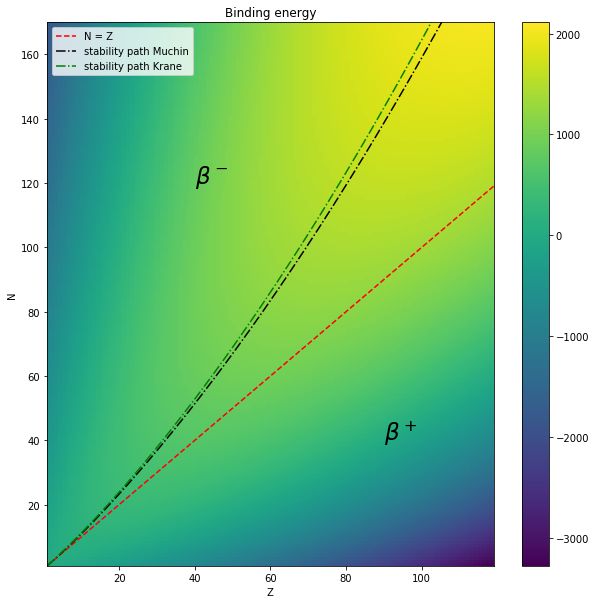

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(Z, N, nucleus_energy(Nv, Zv, D))
fig.colorbar(c)
ax.set_title('Binding energy')
ax.plot(N[:Z.shape[0]], Z, "--r", label='N = Z')
ax.plot(stab_path_Z, stab_path_N,  "-.k", label="stability path Muchin",)
ax.plot(Zmin, Nmin,  "-.g", label="stability path Krane",)
ax.set_xlim(left=Z.min(), right=Z.shape[0])
ax.set_ylim(top=170)
ax.set_ylabel("N")
ax.set_xlabel("Z")
ax.text(90, 40, r"$\beta^+$", fontsize = 23)
ax.text(40, 120, r"$\beta^-$", fontsize = 23)
ax.legend()

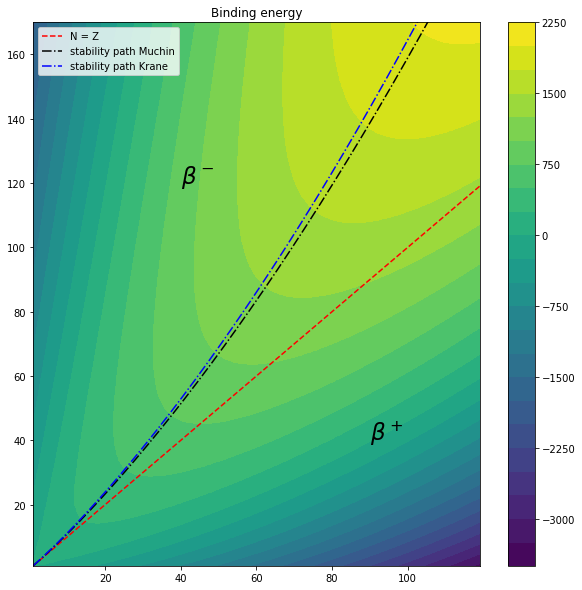

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.contourf(Z, N, nucleus_energy(Nv, Zv, D), levels=24)
fig.colorbar(c)
ax.set_title('Binding energy')
ax.plot(N[:Z.shape[0]], Z, "--r", label='N = Z')
ax.plot(stab_path_Z, stab_path_N,  "-.k", label="stability path Muchin",)
ax.plot(Zmin, Nmin,  "-.b", label="stability path Krane",)
ax.set_xlim(left=Z.min(), right=Z.shape[0])
ax.set_ylim(top=170)
ax.text(90, 40, r"$\beta^+$", fontsize = 23)
ax.text(40, 120, r"$\beta^-$", fontsize = 23)
ax.legend()

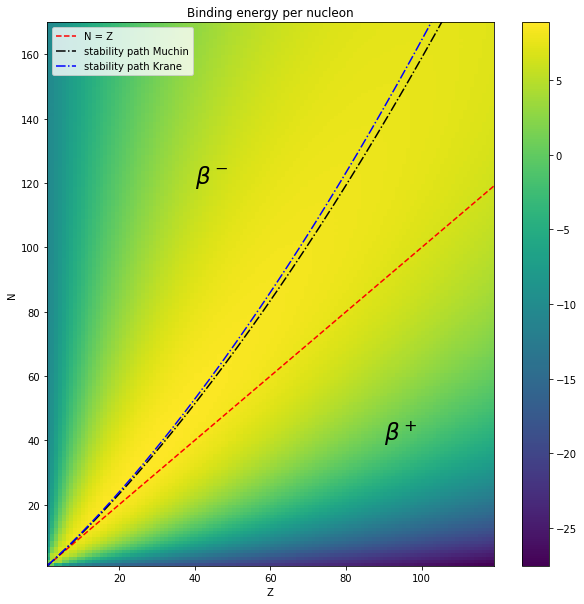

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(Z, N, nucleus_energy(Nv, Zv, D)/(Nv+Zv))
ax.set_xlabel('Z')
ax.set_ylabel('N')
fig.colorbar(c)
ax.set_title('Binding energy per nucleon')
ax.plot(N[:Z.shape[0]], Z, "--r", label='N = Z')
ax.plot(stab_path_Z, stab_path_N,  "-.k", label="stability path Muchin",)
ax.plot(Zmin, Nmin,  "-.b", label="stability path Krane",)
ax.set_xlim(left=Z.min(), right=Z.shape[0])
ax.set_ylim(top=170)
ax.text(90, 40, r"$\beta^+$", fontsize = 23)
ax.text(40, 120, r"$\beta^-$", fontsize = 23)
ax.legend()

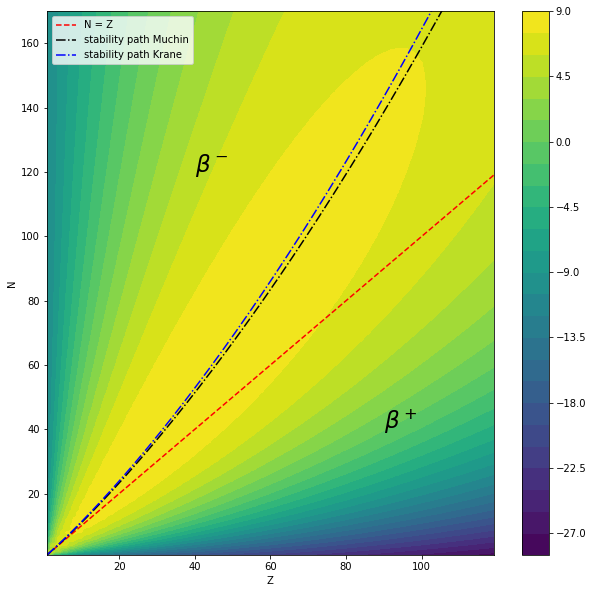

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.contourf(Z, N, nucleus_energy(Nv, Zv, D)/(Nv+Zv), levels=24)
ax.set_xlabel('Z')
ax.set_ylabel('N')
fig.colorbar(c)
ax.plot(N[:Z.shape[0]], Z, "--r", label='N = Z')
ax.plot(stab_path_Z, stab_path_N,  "-.k", label="stability path Muchin",)
ax.plot(Zmin, Nmin,  "-.b", label="stability path Krane",)
ax.set_xlim(left=Z.min(), right=Z.shape[0])
ax.set_ylim(top=170)
ax.text(90, 40, r"$\beta^+$", fontsize = 23)
ax.text(40, 120, r"$\beta^-$", fontsize = 23)
ax.legend()